# Importing

## Importing Libraries

In [135]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# for pre-processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# To split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# To evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing Data

In [201]:
# Reading the csv file
filepath=r"C:\Users\parim\OneDrive\Documents\Student_perfomance_predication\Predicting-Student-Performance-with-Machine-Learning\data\student-dataset.csv"
df = pd.read_csv(filepath, delimiter=';')

# Creating a copy of the DataFrame
data = df.copy()

###
# .copy() will create a true copy
# data = df will just make data refer to df
###

# 1. Understanding the Data

In [137]:
# Checking the top 5 rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [138]:
# Checking the minmum and maximum age so we can understand the spread
print('min age of student:', min(data['age']))
print('max age of student:',max(data['age']))

min age of student: 15
max age of student: 22


In [139]:
# Checking the shape i.e number of rows & columns
data.shape

(395, 33)

In [140]:
data['absences'].unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17])

In [141]:
# Checking the average scores
print('mean of G1:', data['G1'].mean())
print('mean of G2:', data['G2'].mean())

### NOTE: G3 is the final year grade (issued at the 3rd period),
###       while G1 and G2 correspond to the 1st and 2nd period grades.
###       G3 is strongly correlated with G1 and G2
print('mean of G3:', data['G3'].mean())

mean of G1: 10.90886075949367
mean of G2: 10.713924050632912
mean of G3: 10.415189873417722


In [142]:
table = data.groupby('traveltime')['G3'].mean()
table

,G3
traveltime,
1,10.782101
2,9.906542
3,9.260870
4,8.750000


# 2. Data Preparation

## 2.1 Data Cleaning

In [143]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [144]:
# Checking for duplicate data
data.duplicated().sum()

0

In [145]:
# CHecking the number of unique values in each column
data.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [146]:
# Information about the data types and the no. of entries in the columns
data['school'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 395 entries, 0 to 394
Series name: school
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## 2.2 Categorizing Features

Categorical features

In [147]:
# Getting Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns

# Getting Nominal Features
categorical_features_nominal = ['Mjob', 'Fjob', 'reason', 'guardian']

# Ordinal Features - Removing the nominal features from the categorical features
categorical_features_ordinal = list(categorical_features.drop(categorical_features_nominal))

Numerical features

In [148]:
# Getting Numerical Features
numerical_features = list(data.select_dtypes(exclude=['object']).columns)

# 3. Feature Engineering


## 3.1 Final Grades
  COnverting marks into percentage and assigning grades -
  * 16-20 : Excellent
  * 14-15 : Good
  * 12-13 : Satisfactory
  * 10-11  : Poor
  * 0-9   : Fail

In [203]:
data.loc[data['G3'] >= 16, 'final_grade'] = 'Excellent' # above 18
data.loc[data['G3'].between(13,16), 'final_grade'] = 'Good' # 15-17
data.loc[data['G3'].between(11,14), 'final_grade'] = 'Satisfactory' # 11-14
data.loc[data['G3'].between(9,12), 'final_grade'] = 'Poor' # 6-10
data.loc[data['G3'] <= 9, 'final_grade'] = 'Fail' # below 6

# Plotting function

In [150]:
def multiplot(x: list, y: str, data: pd.DataFrame, plot_type: str, palette= None, grid=False, dpi=100) -> Axes:

  # Checking the DataTypes of the arguments
  if not isinstance(x, list):
    raise TypeError('Input must be a list. Ensure it\'s a list of feature column names.')

  if not isinstance(y, str):
    raise TypeError('Input must be a string')

  if not isinstance(data, pd.DataFrame):
    raise TypeError('Input must be a DataFrame')

  if not isinstance(plot_type, str):
    raise TypeError('Input must be a string')

  if palette is None:
    palette = sns.color_palette('muted')

  if not isinstance(grid, bool):
    raise TypeError('Input must be a boolean')

  if not isinstance(dpi, int):
    raise TypeError('Input must be an integer')


  # Settings
  sns.set_style('white')
  if grid is True:
    sns.set_style('whitegrid')


  if dpi is None:
    dpi = 100

  # creating the plot function from input
  plot_func = getattr(sns, plot_type, None)

  if plot_func is None or not callable(plot_func):
    raise ValueError(f'Invalid plot type: {plot_type}. Ensure it\'s a valid Seaborn plot type.')

  # Getting the number of features
  length = int(len(x))

  # Calculating the size of the plot
  rows = int(np.ceil(length/3)) # Such that we have 3 plot in each row

  # Dynamically adjusting the figure size
  figsize = (3 * 4.7, rows * 4.7)

  #creating the plot
  f, axs = plt.subplots(rows, 3, figsize=figsize, dpi=dpi)

  # Flatten axs for easier indexing if there is only one row or column
  axs = axs.flatten()

  # iterating through subplots
  for count, ax in enumerate(axs):
    if count < length:
      # Getting the feature to plot
      feature = x[count]

      # Plotting
      plot_func(x=data[feature], y=data[y], palette=palette, ax=ax)
      ax.set_title(f'{y} by {feature}')

    else:
      # Deleting unused subplots
      ax.axis('off')

  # Adding title and finishing touches
  plt.suptitle('Bivariate Data Analysis', fontsize=16)
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

  return f

# 4. EDA - Exploratory Data Analysis

In [151]:
# Setting a color palette for Visuals
color_palette = sns.color_palette('muted')

## Documented graphs
### For Inisghts, find the link to the complete documentation in the **README** file.

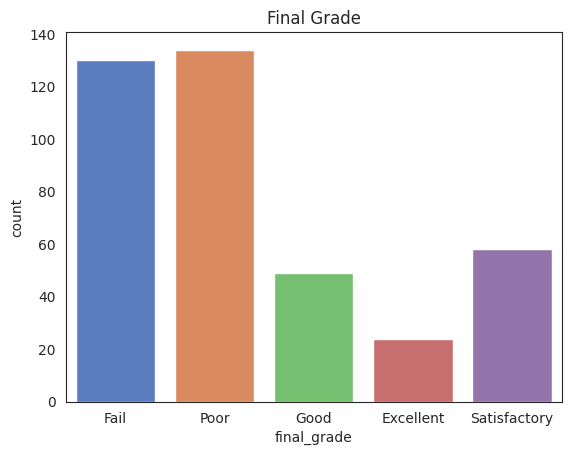

In [204]:
sns.countplot(x=data['final_grade'], palette=color_palette)
plt.title('Final Grade')
plt.savefig('final_grade.png')

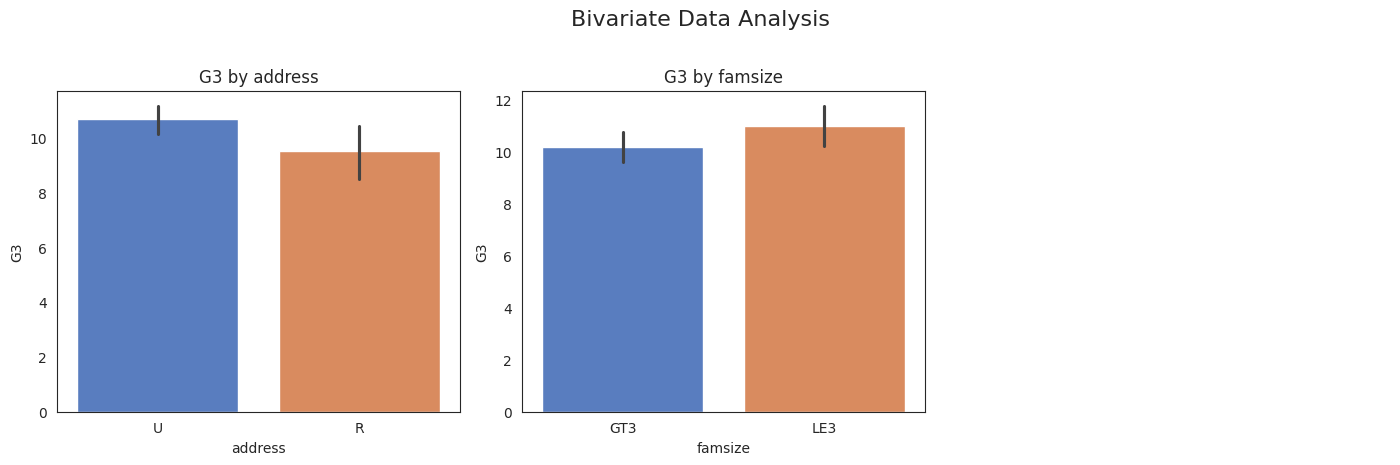

In [205]:
X, Y = ['address', 'famsize'], 'G3'

plot = multiplot(x=X, y=Y ,data=data, plot_type='barplot', palette=color_palette)
plot.savefig('plot1')

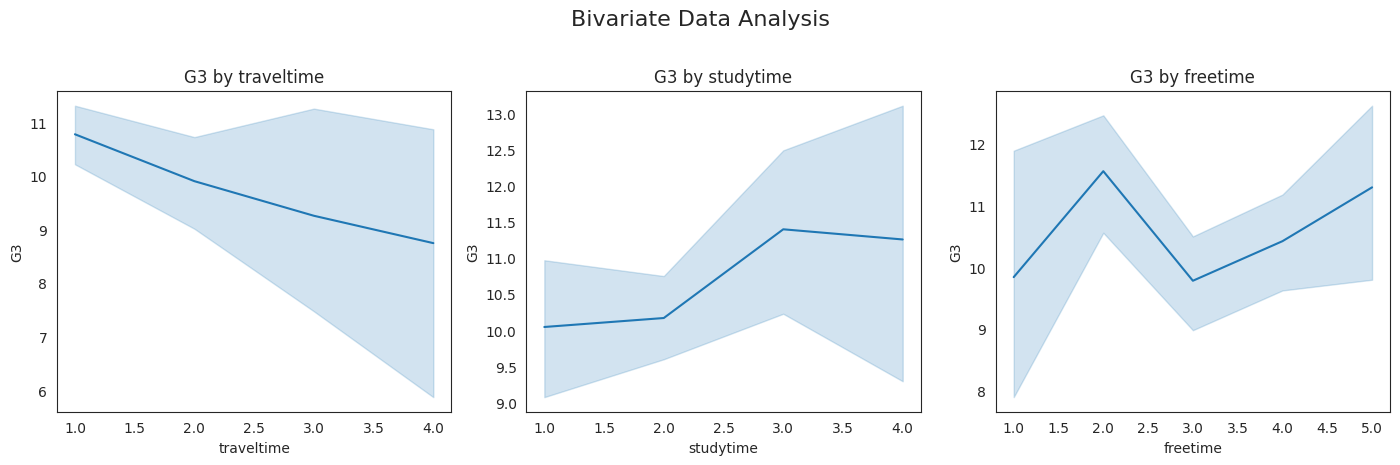

In [154]:
X, Y = ['traveltime', 'studytime', 'freetime'], 'G3'

plot = multiplot(x=X, y=Y ,data=data, plot_type='lineplot', palette=color_palette)
plot.savefig('plot2')

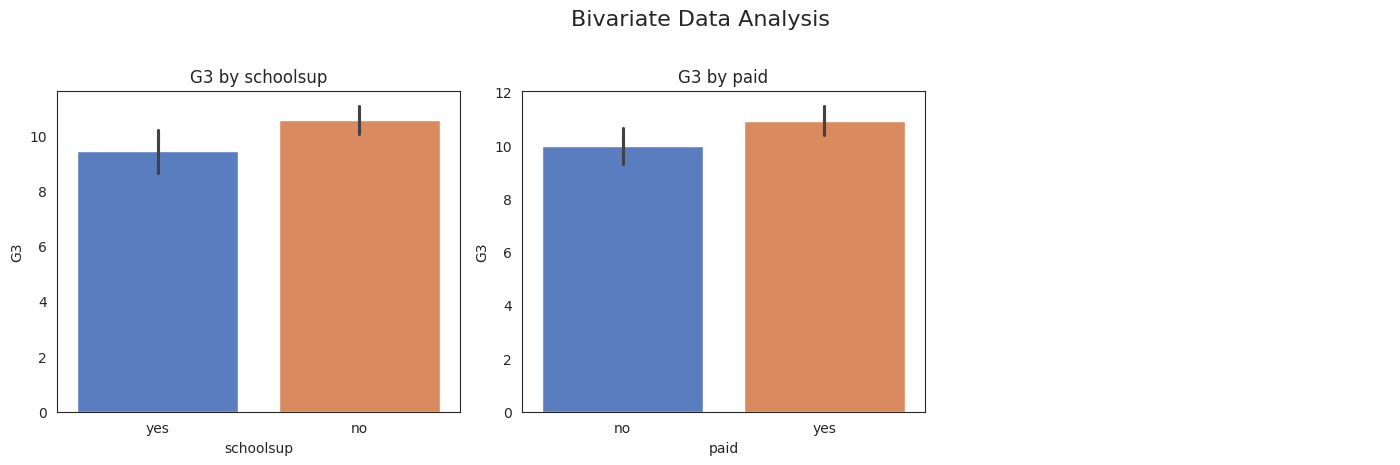

In [206]:
X, Y = ['schoolsup', 'paid'], 'G3'

plot = multiplot(x=X, y=Y ,data=data, plot_type='barplot', palette=color_palette)
plot.savefig('plot3')

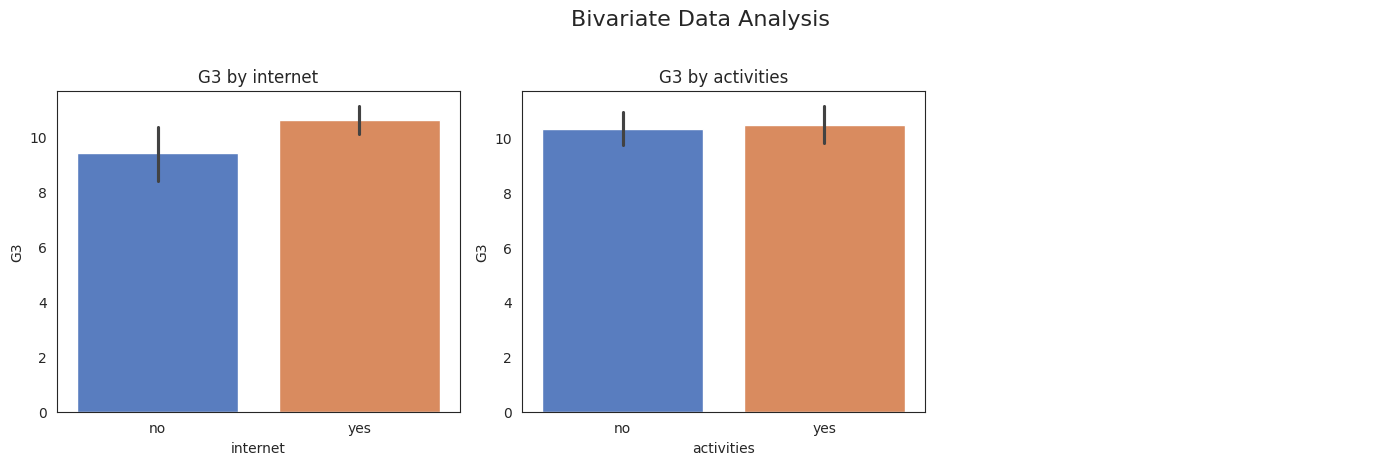

In [156]:
X, Y = ['internet', 'activities'], 'G3'

plot = multiplot(x=X, y=Y ,data=data, plot_type='barplot', palette=color_palette)
plot.savefig('plot4')

In [157]:
data.iloc[:,18]

,activities
0,no
1,no
2,no
3,yes
4,no
...,...
390,no
391,no
392,no
393,no


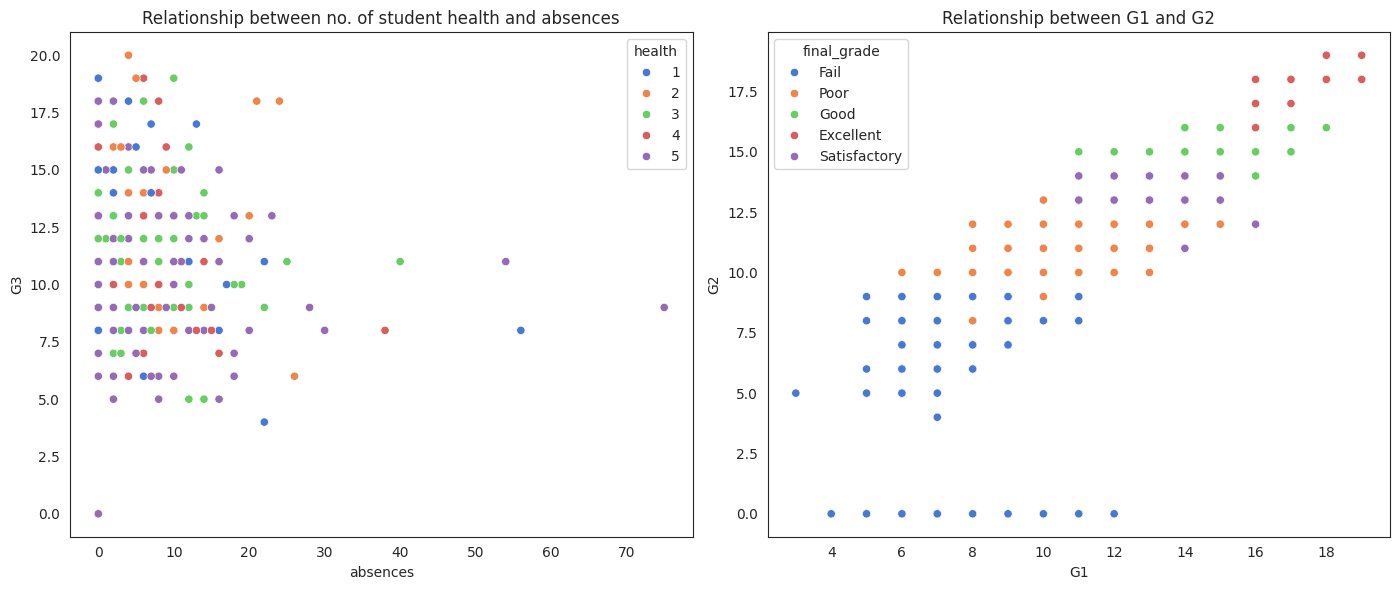

In [158]:
f, axs = plt.subplots(1,2, figsize=(14.1,6))


ax = axs[0]
sns.scatterplot(x=data['absences'], y=data['G3'], hue=data['health'], palette=color_palette, ax=ax)
ax.set_title('Relationship between no. of student health and absences')

ax = axs[1]
sns.scatterplot(x=data['G1'], y=data['G2'], hue=data['final_grade'], palette=color_palette, ax=ax)
ax.set_title('Relationship between G1 and G2')

plt.tight_layout()
plt.savefig('plot5.png')

## 4.1 Univariate Data Analyis

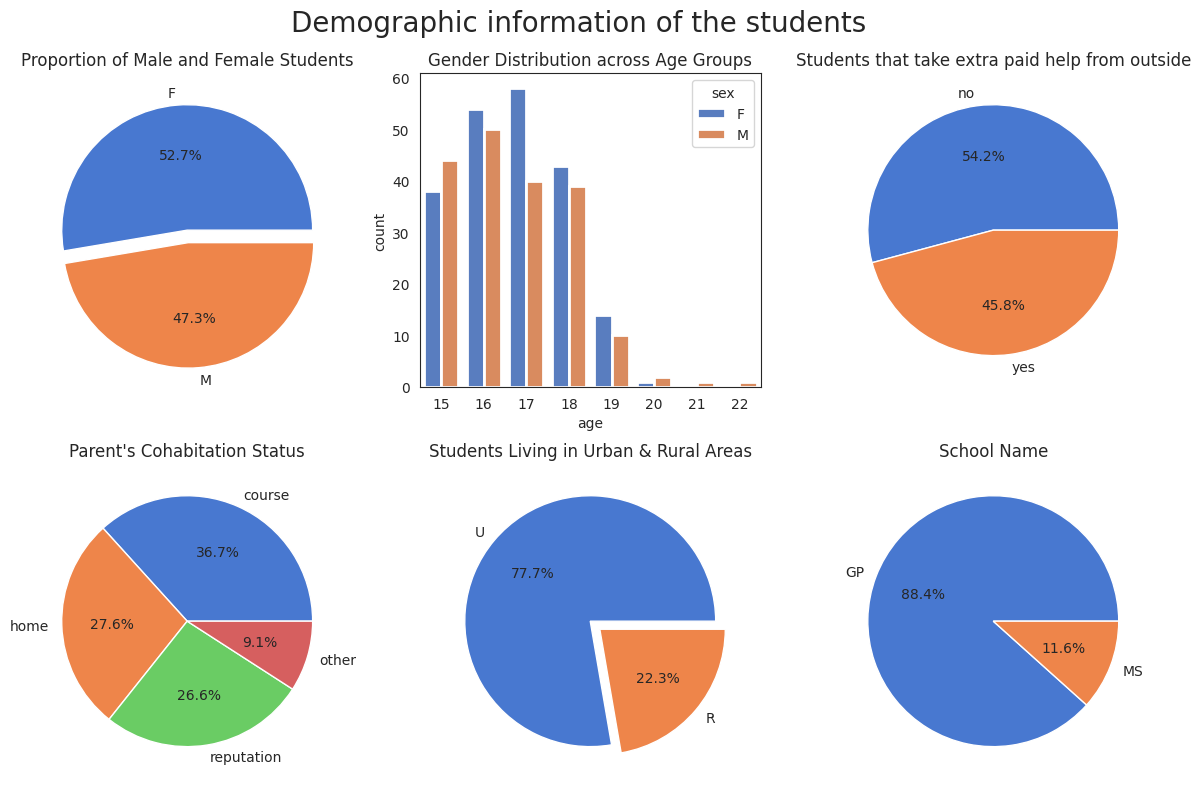

In [159]:
# Creating basic plots about the Demographic information of students

f, axs = plt.subplots(2,3, figsize=(12,8))

ax = axs[0,0]
ax.pie(x=data['sex'].value_counts(), labels = data['sex'].value_counts().index,
       colors = color_palette, autopct='%1.1f%%', explode=(0,0.1))
ax.set_title('Proportion of Male and Female Students')

ax = axs[0,1]
sns.countplot(x=data['age'], hue=data['sex'],
              palette = color_palette, linewidth=2, ax=ax)
ax.set_title('Gender Distribution across Age Groups')

ax = axs[0,2]
ax.pie(x=data['paid'].value_counts(),
       labels = data['paid'].value_counts().index,
       colors = color_palette,
       autopct='%1.1f%%')
ax.set_title('Students that take extra paid help from outside')

ax = axs[1,0]
ax.pie(x=data['reason'].value_counts(),
       labels = data['reason'].value_counts().index,
       colors = color_palette,
       autopct='%1.1f%%')
ax.set_title('Parent\'s Cohabitation Status')

ax = axs[1,1]
ax.pie(x=data['address'].value_counts(),
       labels=data['address'].value_counts().index,
       colors = color_palette, autopct= '%1.1f%%',
       explode = (0,0.1))
ax.set_title('Students Living in Urban & Rural Areas')

ax = axs[1,2]
ax.pie(x=data['school'].value_counts(),
       labels=data['school'].value_counts().index,
       colors = color_palette, autopct= '%1.1f%%')
ax.set_title('School Name')


plt.suptitle('Demographic information of the students', fontsize=20)


#plt.delaxes(ax=axs[1,2])
plt.tight_layout()
plt.show()

### Insights:


*   No. of female students and male students is almost equal, no. of female students is slightly higher.
*   Most no. of students are between the ages 15-18

*   Most of the students are from Gabriel Pereira School.

*   Almost 50% of the students take extra paid classes outside of school.
*   The reason majority of the students joined is due to the course.
  * Distance from home and school reputation.


*   78% of the students come from Urban areas and 22% from Rural areas.







## 4.2 Bivariate Data Analysis

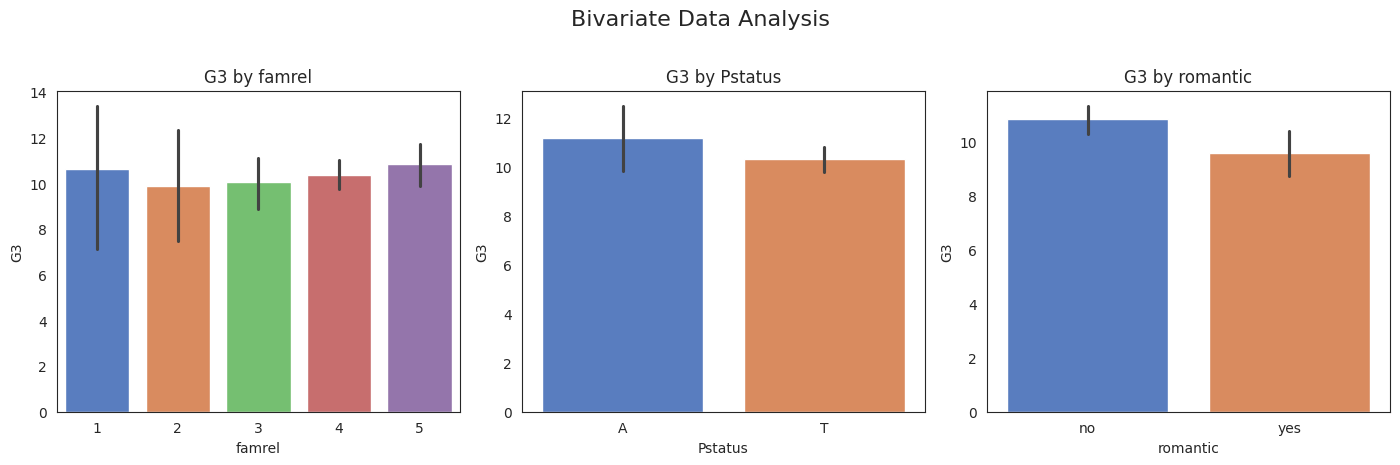

In [160]:
# Creating more graphs that are related to the student's academics

graphs_list = ['famrel', 'Pstatus', 'romantic']

fig = multiplot( x=graphs_list, y='G3', data=data, plot_type='barplot', palette=color_palette)
fig.savefig('Extra graphs')

Insights:


*   Family of 3 or less show better family relationship.

*   Students with Internet availability show higher marks


*   Students taking extra paid classes show higher marks.

*   Students who study for 5-10 hours a week show higher average marks.

*   Optimal free time after school is 2.
    * 1 - very low; 5 - very high

* Consumption of alcohol during the week increases the more they go out with friends.

*   Most students scored poorly.




# 5. Data Pre-Processing

## 5.1 Pre-processing


In [161]:
# Creating a backup
data_backup = data.copy()

Label encoder - For Ordinal Data (There is order of significance)\
One Hot Encoder - For Nominal Data (No order of significance)

In [162]:
# Scaling Categorical Ordinal Features

label = LabelEncoder()

# Going through and converting one column at a time
for col in categorical_features_ordinal:
  data[col] = label.fit_transform(data[col])

In [163]:
# Scaling Categorical Nominal Features
one_hot = OneHotEncoder(sparse=False, drop='first')

# Convert the columns
one_hot_encoded = one_hot.fit_transform(data[categorical_features_nominal])

# convert the above into a DataFrame
encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot.get_feature_names_out(categorical_features_nominal))

# Now add the new df in place of the old ones in the Data
data = pd.concat([data.drop(columns=categorical_features_nominal), encoded_df], axis=1)

In [164]:
# Scaling Numerical Features

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [165]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,1.023046,1,0,0,1.143856,1.360371,0.792251,-0.042286,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,-0.643249,-0.042286,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,-0.643249,-0.042286,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,-0.643249,1.150779,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0,-0.546287,1,0,1,0.229234,0.440257,-0.643249,-0.042286,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 5.2 Feature Selection

In [166]:
# dropping features
data=data.drop(['sex', 'G1', 'G2'], axis=1)

In [167]:
# Independent Variables - Feature table that will be used to predict Y
X = data.drop(columns='G3')
X = data.drop(columns='final_grade')

In [168]:
# Dependent Variable
Y = data['G3']

In [169]:
# Selecting the best Features using SelectKbest and f_regression
feature_selector = SelectKBest(score_func=f_regression, k='all')
X_new = feature_selector.fit_transform(X,Y)

In [170]:
# Saving the new features to variable X
X = X_new

## 5.3 Train Test Split

In [171]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=44)

# 6. Modelling

## 6.1 Initialising the models

In [172]:
# Initialising the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor()
}

## 6.2 Training

In [173]:
# Training the models
for name, model in models.items():
  model.fit(X_train, Y_train)

# 7 Model Evaluation

## 7.1 Calculating metrics

In [174]:
# Evaluating the models
results = {}
overfit = {}

for name, model in models.items():
  Y_pred = model.predict(X_test)

  mae = mean_absolute_error(Y_test, Y_pred)
  mse = mean_squared_error(Y_test, Y_pred)
  rmse = mean_squared_error(Y_test, Y_pred, squared=False)
  r2 = r2_score(Y_test, Y_pred)

  # Storing results
  results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'r2': r2}



  ### Calculating Overfitting ####

  # Predicting on training data and testing data (Seen and Unseen data)
  training_preds = model.predict(X_train)
  testing_preds = model.predict(X_test)

  # Calculating the MSE
  train_MSE = mean_squared_error(Y_train, training_preds)
  test_MSE = mean_squared_error(Y_test, testing_preds)

  # overfitting values
  overfit[name] = {'Training MSE': train_MSE, 'Testing MSE':test_MSE}

#number of metrics
n = len(results[list(models.keys())[0]])

# Printing the results
results_df = pd.DataFrame.from_dict(results).T # .T to transpose it
overfit_df = pd.DataFrame.from_dict(overfit).T

# calucating difference to check overfitting
overfit_df['Difference'] = abs(overfit_df['Training MSE'] - overfit_df['Testing MSE'])

print(results_df)
print(f'\n{overfit_df}')

                                  MAE           MSE          RMSE        r2
Linear Regression        8.637605e-16  1.189023e-30  1.090423e-15  1.000000
Random Forest Regressor  4.204987e-03  6.495839e-04  2.548694e-02  0.999390
Support Vector Machine   1.751369e-01  6.000627e-02  2.449618e-01  0.943675
Neural Network           1.399901e-01  3.180245e-02  1.783324e-01  0.970148

                         Training MSE   Testing MSE    Difference
Linear Regression        1.248376e-30  1.189023e-30  5.935338e-32
Random Forest Regressor  7.864355e-05  6.495839e-04  5.709404e-04
Support Vector Machine   8.173978e-03  6.000627e-02  5.183230e-02
Neural Network           5.842573e-03  3.180245e-02  2.595987e-02


## 7.2 Comparing models

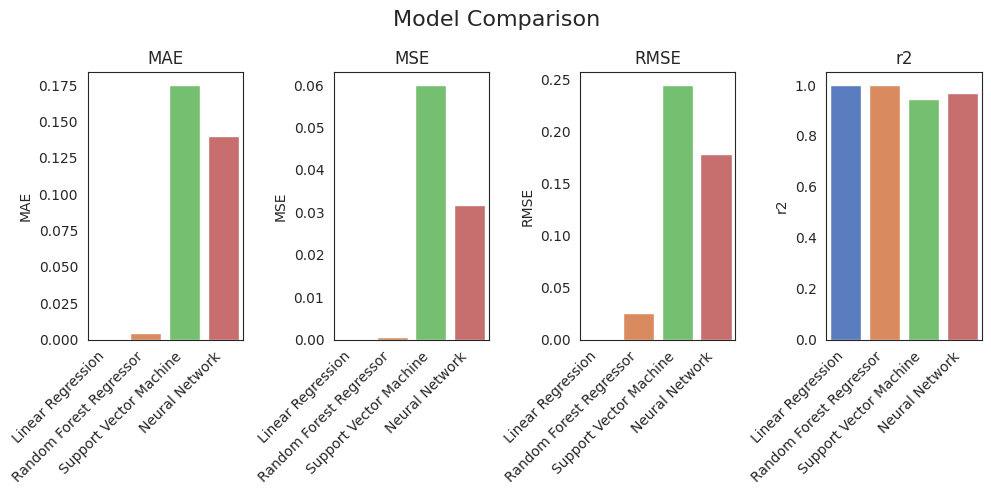

In [175]:
# creating a figure to compare the model metrics
f, axs = plt.subplots(1,n,figsize=(10,5))

for i in range(0,n):
  ax=axs[i]
  metric = results_df.columns[i]
  sns.barplot(x=results_df.index, y = results_df[metric], palette=color_palette, ax=ax)
  ax.set_title(metric)
  ax.set_xticklabels(labels=results_df.index, rotation=45, ha='right')
  ax.set_xlabel('')
  ax.set_ylabel(metric)

plt.suptitle('Model Comparison', fontsize=16)
plt.tight_layout()
plt.savefig('Model_performance')
plt.show()

## 7.3 Overfitting Visualisation

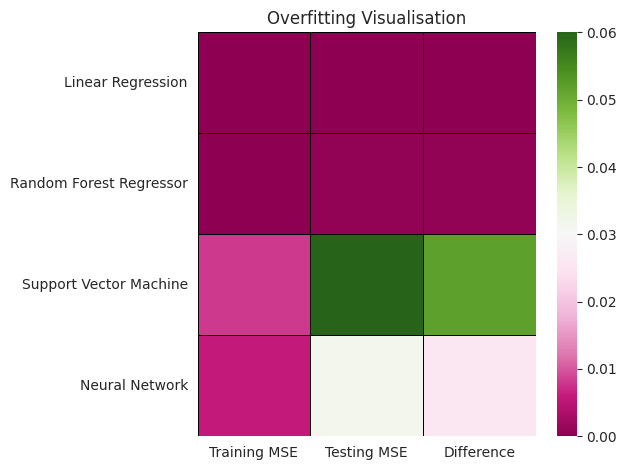

In [176]:
# Creating a heatmap for overfitting values
sns.heatmap(data=overfit_df, cmap="PiYG", linewidth=0.5, linecolor='black')
plt.title('Overfitting Visualisation')
plt.tight_layout()
plt.savefig('overfitting.png')

We conclude that Linear Regression is the best fit.

**For detailed explanation, see the documentation linked in README file**

# 8. Most significant features

In [192]:
# Intialising our best model
best_model = LinearRegression()
best_model.fit(X,Y)

# getting the coefficients in the model
coefficients = best_model.coef_

# Generating feature_names
feature_names = [(f'feature{i}') for i in range(X.shape[1])]

#Converting to a DataFrame and sorting in descending order
coeff_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Creating a column for absolute values
coeff_df['abs_coeff'] = coeff_df['coefficient'].abs()

# Sorting the coefficients in descending order of the absolute coefficients.
coeff_df = coeff_df.sort_values(by='abs_coeff', ascending=False)

print(coeff_df)

      feature   coefficient     abs_coeff
25  feature25  1.000000e+00  1.000000e+00
5    feature5  9.126349e-16  9.126349e-16
20  feature20 -5.110544e-16  5.110544e-16
10  feature10 -4.543786e-16  4.543786e-16
21  feature21  4.132353e-16  4.132353e-16
9    feature9  3.449417e-16  3.449417e-16
1    feature1  3.191891e-16  3.191891e-16
6    feature6 -3.179384e-16  3.179384e-16
19  feature19  3.106376e-16  3.106376e-16
16  feature16 -2.864035e-16  2.864035e-16
36  feature36 -2.402592e-16  2.402592e-16
2    feature2 -2.389227e-16  2.389227e-16
4    feature4  2.199694e-16  2.199694e-16
37  feature37  2.099015e-16  2.099015e-16
12  feature12  2.083377e-16  2.083377e-16
17  feature17 -2.072266e-16  2.072266e-16
35  feature35  2.059984e-16  2.059984e-16
22  feature22  1.899181e-16  1.899181e-16
34  feature34 -1.691355e-16  1.691355e-16
0    feature0 -1.593287e-16  1.593287e-16
26  feature26 -1.575706e-16  1.575706e-16
38  feature38  1.509209e-16  1.509209e-16
13  feature13  1.473058e-16  1.473

Getting the top 4 most significant features

In [195]:
# Storing the top 4 feature numbers
sig_feature_numbers = coeff_df.head(4).index

# list to store the actual feature names
sig_feature_names = []

# Getting the actual names from feature numbers
sig_feature_names = [data.iloc[:,j].name for j in sig_feature_numbers]

print(sig_feature_names)

['G3', 'Medu', 'goout', 'schoolsup']


We Ignore 'G3' as its the target variable

# 9. Interpretation


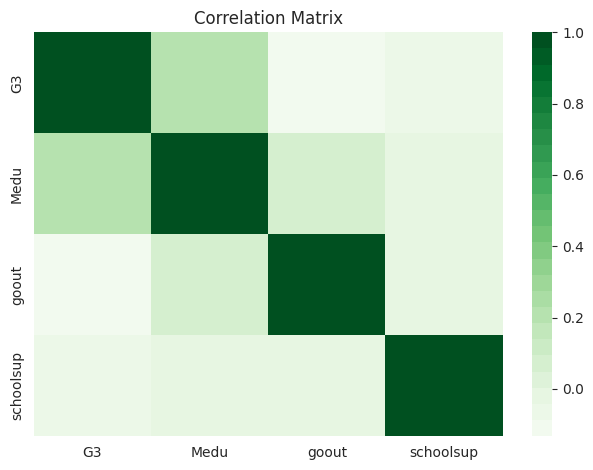

In [196]:
# Creating a table with significant features
signif_table = data[sig_feature_names]

# Heatmap of correlation matrix
corr_matrix = signif_table.corr()
sns.heatmap(corr_matrix, cmap=sns.color_palette("Greens",25))
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()